# 手写数字识别



*   Author = Stephen Cheung
*   References = [Handwritten Digit Recognition Using PyTorch — Intro To Neural Networks](https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627)
*   Dataset = MNIST
*   Frameworks = PyTorch






## Necessary Impots 


In [0]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [0]:
import os
from google.colab import drive

## Download The Dataset & Define The Transforms


In [0]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 8904696.49it/s]                            


Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 56038.75it/s]                           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw


1654784it [00:02, 567551.81it/s]                             
0it [00:00, ?it/s]

Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw


8192it [00:00, 49533.48it/s]            


Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw
Processing...
Done!


##Exploring The Data


In [0]:
dataiter = iter(trainloader)he Data
[4]
### Run this cell

from torchvision import datasets, transforms
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


Show one training data

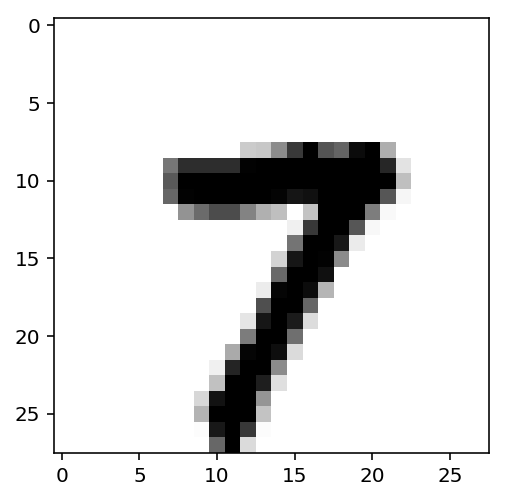

In [0]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

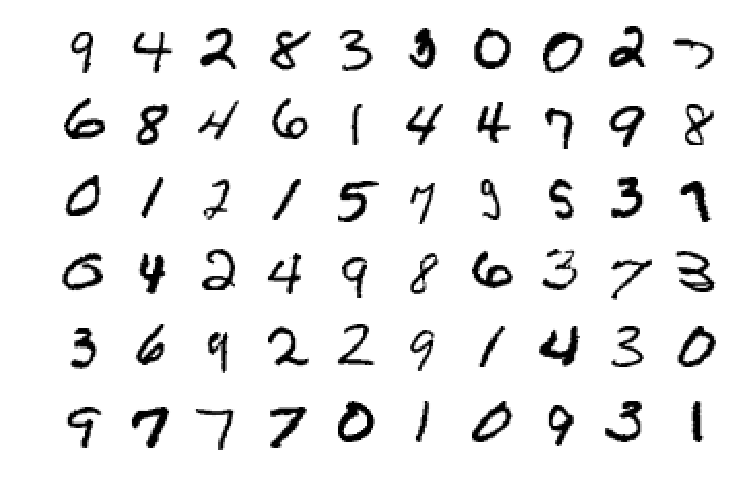

In [0]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

##Defining the Neural Network


![alt text](https://miro.medium.com/max/787/1*HWhBextdDSkxYvz0kEMTVg.png)

In [0]:

from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [0]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [0]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)


Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0044, -0.0044, -0.0044,  ..., -0.0044, -0.0044, -0.0044],
        [-0.0045, -0.0045, -0.0045,  ..., -0.0045, -0.0045, -0.0045],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        ...,
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [-0.0028, -0.0028, -0.0028,  ..., -0.0028, -0.0028, -0.0028],
        [ 0.0019,  0.0019,  0.0019,  ...,  0.0019,  0.0019,  0.0019]])


In [0]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [0]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0238, -0.0129,  0.0136,  ..., -0.0217, -0.0074, -0.0178],
        [ 0.0254,  0.0097, -0.0238,  ..., -0.0280,  0.0347,  0.0215],
        [ 0.0217, -0.0090,  0.0326,  ..., -0.0046,  0.0069, -0.0350],
        ...,
        [ 0.0170,  0.0338,  0.0331,  ...,  0.0266,  0.0113,  0.0286],
        [-0.0250,  0.0016, -0.0016,  ...,  0.0265,  0.0061, -0.0271],
        [-0.0109, -0.0127, -0.0190,  ..., -0.0328,  0.0070,  0.0079]],
       requires_grad=True)
Gradient - tensor([[ 0.0045,  0.0045,  0.0045,  ...,  0.0045,  0.0045,  0.0045],
        [-0.0051, -0.0051, -0.0051,  ..., -0.0051, -0.0051, -0.0051],
        [-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020],
        ...,
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0026,  0.0026,  0.0026,  ...,  0.0026,  0.0026,  0.0026],
        [-0.0038, -0.0038, -0.0038,  ..., -0.0038, -0.0038, -0.0038]])


In [0]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0238, -0.0130,  0.0135,  ..., -0.0217, -0.0075, -0.0178],
        [ 0.0255,  0.0098, -0.0238,  ..., -0.0280,  0.0347,  0.0215],
        [ 0.0217, -0.0089,  0.0326,  ..., -0.0045,  0.0069, -0.0350],
        ...,
        [ 0.0170,  0.0338,  0.0331,  ...,  0.0266,  0.0113,  0.0286],
        [-0.0250,  0.0016, -0.0016,  ...,  0.0265,  0.0061, -0.0272],
        [-0.0108, -0.0126, -0.0190,  ..., -0.0328,  0.0070,  0.0080]],
       requires_grad=True)


##Core Training Of Neural Network

In [0]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6311637910762067
Epoch 1 - Training loss: 0.28476624225756764
Epoch 2 - Training loss: 0.22541216735853187
Epoch 3 - Training loss: 0.18300676630583526
Epoch 4 - Training loss: 0.15277180794888595
Epoch 5 - Training loss: 0.13061566211219663
Epoch 6 - Training loss: 0.1137856474078731
Epoch 7 - Training loss: 0.09948472370173154
Epoch 8 - Training loss: 0.08929799637123784
Epoch 9 - Training loss: 0.08039621249991043
Epoch 10 - Training loss: 0.07447228500587759
Epoch 11 - Training loss: 0.06673072301608914
Epoch 12 - Training loss: 0.060974660686957935
Epoch 13 - Training loss: 0.05713162789029925
Epoch 14 - Training loss: 0.05282576085636213

Training Time (in minutes) = 2.2198259154955546


In [0]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 5


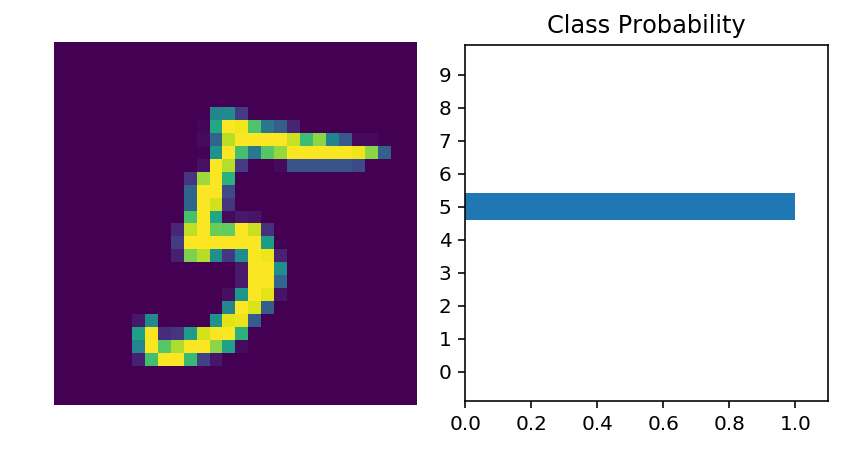

In [0]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

Model Evaluation

In [0]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9733
